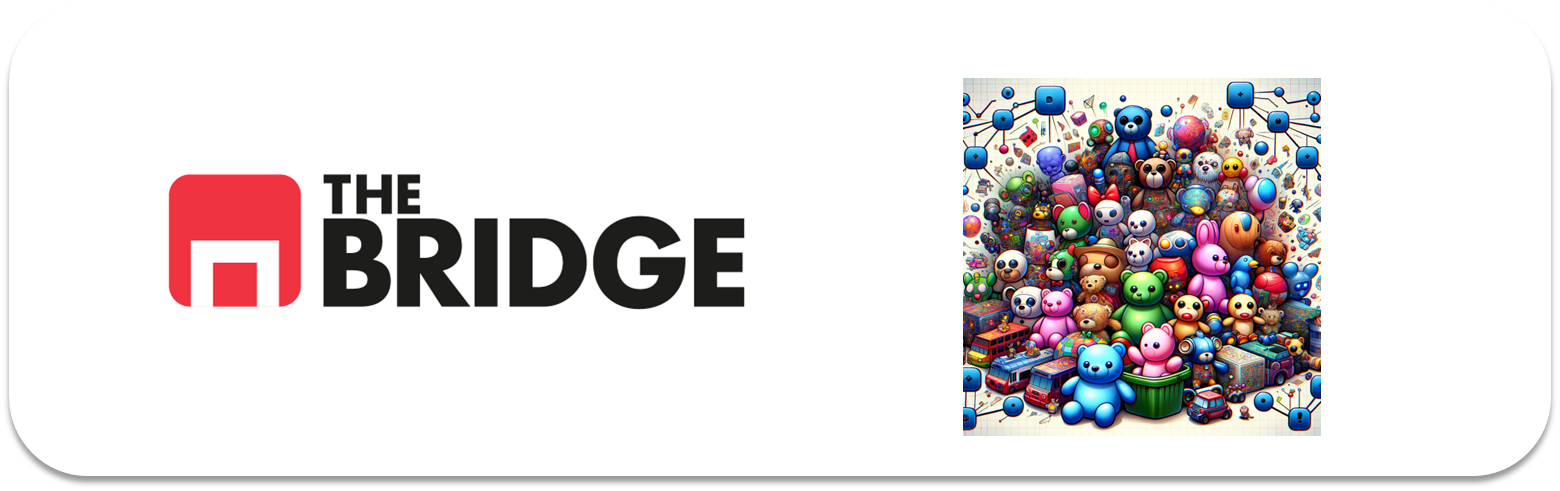

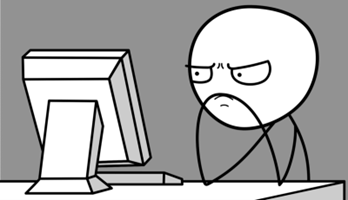

Para ejercitarte y afianzar lo aprendido sobre **Clustering Jerárquico**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Descripción del "Problema"

Existen disponibles datos de encuestas y cuestionarios a 26 instituciones. Estas instituciones han sido evaluadas bajo distintos criterios de desempeño, como profesorado, costos, ubicación, becas e infraestructura. Cada criterio va del 1 al 5, siendo 5 el mayor.

El objetivo principal será segmentar las instituciones en grupos basásndonos en los criterios antes mencionados, y luego generar descripciones y recomendaciones a seguir con respecto a cada uno de los grupos identificados. Las recomendaciones pueden ser para distintos clientes.
    </div>

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los datos ("Engg_College_Data") y haz una primera inspección "rápida".

In [52]:
df_1 = pd.read_csv("./data/Engg_College_Data.csv")
df_1

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5
5,6,F,3,4,3,3,4
6,7,G,1,3,1,1,2
7,8,H,4,4,5,5,5
8,9,I,4,4,4,4,4
9,10,J,3,4,3,4,5


In [53]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.6+ KB


| Variable       | Descripción                                      |
|----------------|--------------------------------------------------|
| SR_NO          | Número de serie del colegio                      |
| Engg_College   | Nombre o código del colegio de ingeniería        |
| Teaching       | Evaluación de la calidad de la enseñanza (1-5)   |
| Fees           | Evaluación de las tarifas (1-5)                  |
| Placements     | Evaluación de las oportunidades de colocación (1-5) |
| Internship     | Evaluación de las oportunidades de prácticas (1-5) |
| Infrastructure | Evaluación de la infraestructura del colegio (1-5) |


### Ejercicio 2

Crea un train_set con una única variable de tipo índice (que nos servirá para identifcar a las instituciones en cada clúster)

In [54]:
df = df_1.drop(columns="Engg_College")
df.head()

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
0,1,5,2,5,5,3
1,2,4,2,5,5,3
2,3,4,5,5,4,5
3,4,5,4,5,4,4
4,5,2,5,2,2,5


### Ejercicio 3

Determina el tipo de cada variable, haciendo un univariante de las mismas.

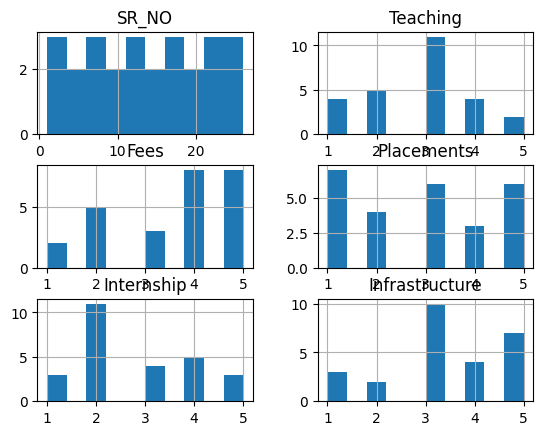

In [5]:
df.hist()
plt.tight_layout;

In [6]:
df.describe()

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,2.807692,3.576923,2.884615,2.769231,3.384615
std,7.648529,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.250000,2.000000,2.250000,1.250000,2.000000,3.000000
50%,13.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,19.750000,3.000000,5.000000,4.000000,4.000000,4.750000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Ejercicio 4

Es hora de hacer el miniEDA. Fíjate que en este caso no tenemos contínuas numéricas que nos permitan ver claramente una clusterización con scatter plots. Compruébalo haciendo un pairplot del dataset.

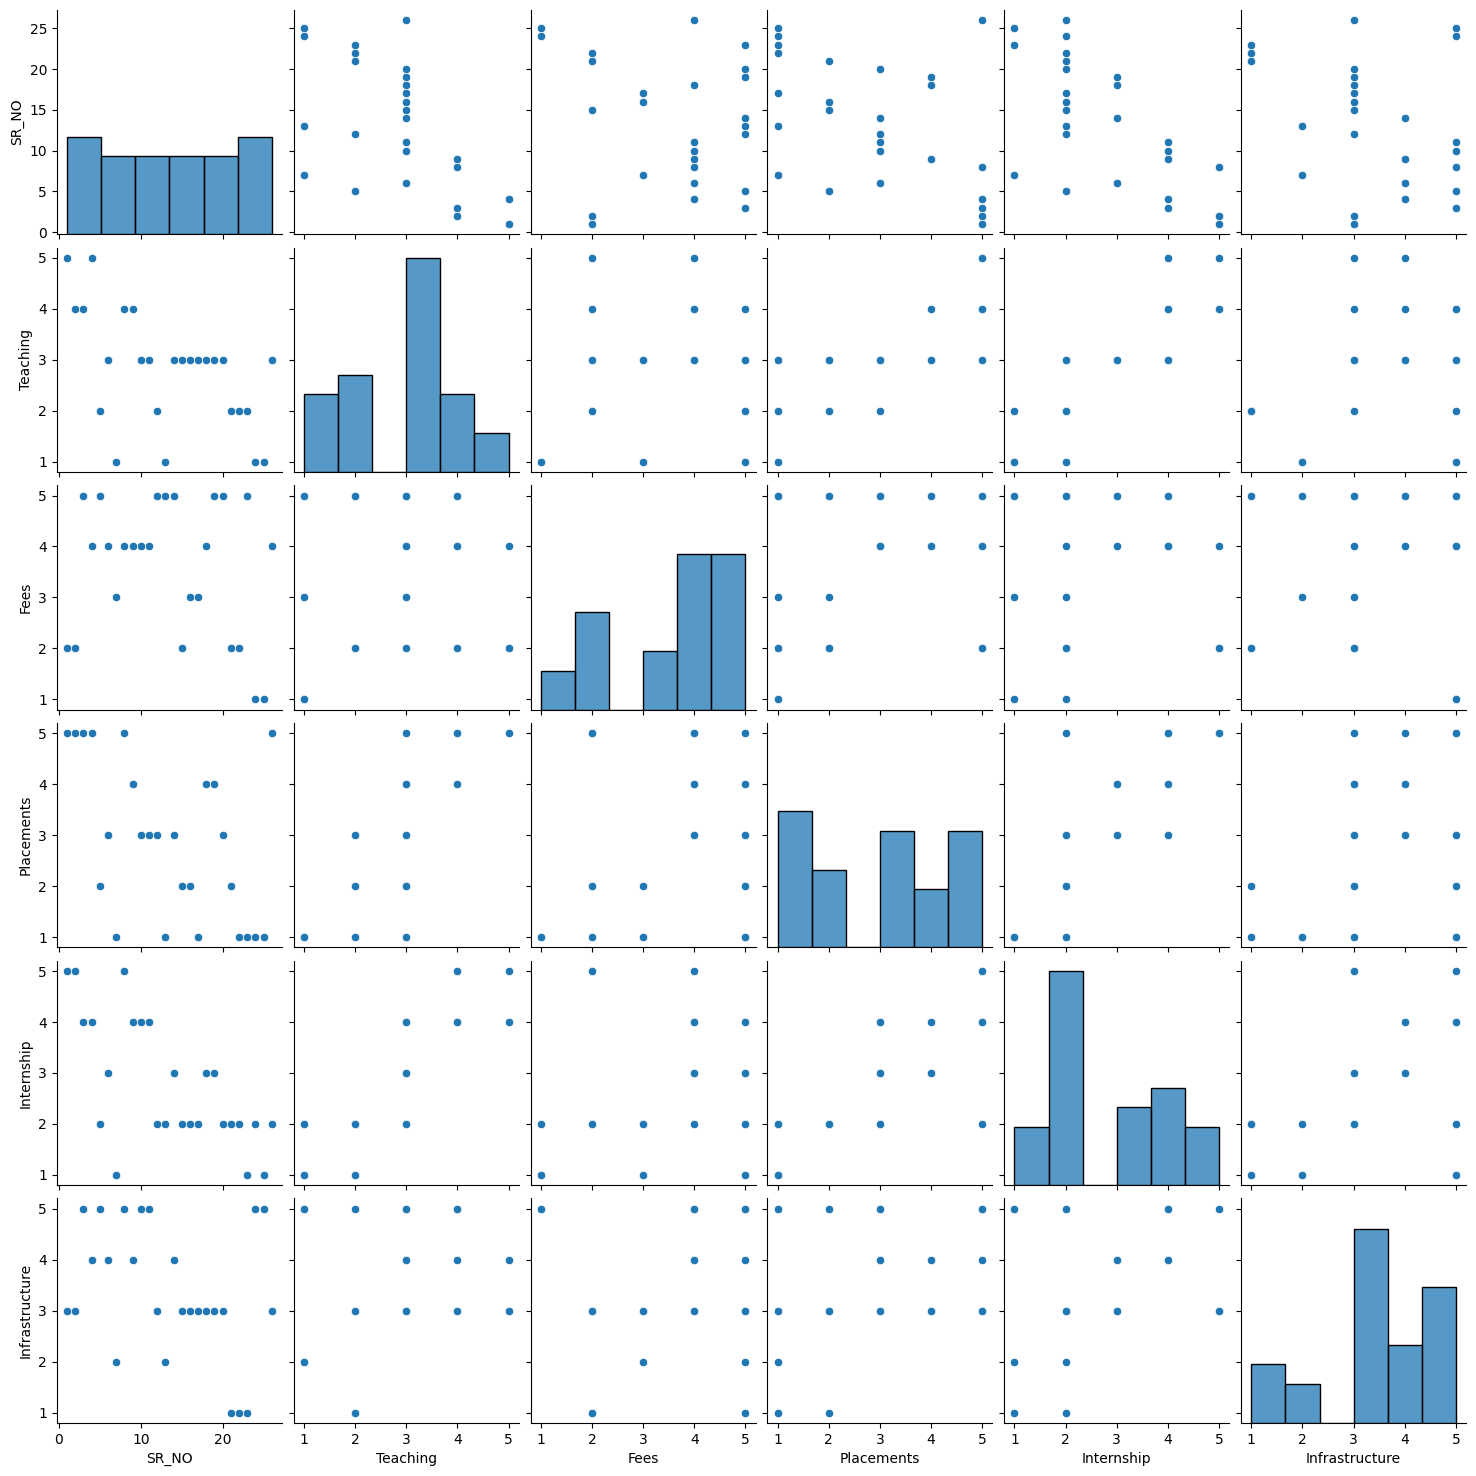

In [7]:
train_set = df
sns.pairplot(train_set);

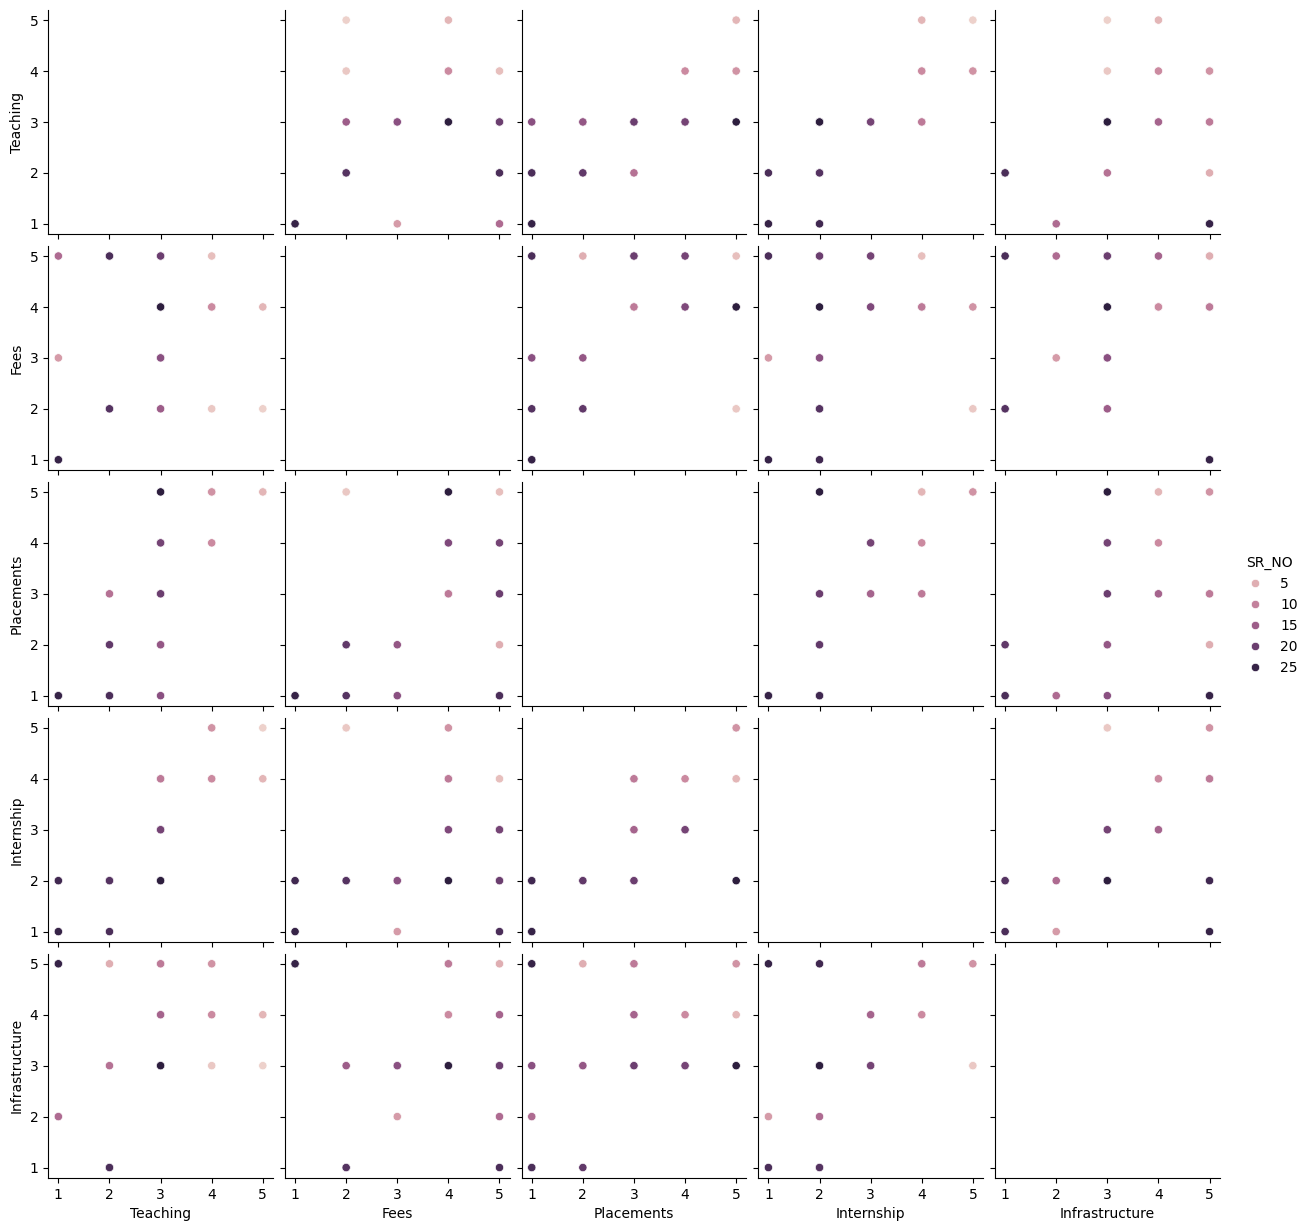

In [8]:
sns.pairplot(train_set, hue="SR_NO")

Text(0.5, 1.0, 'Heatmap de Correlaciones de los Colegios de Ingeniería')

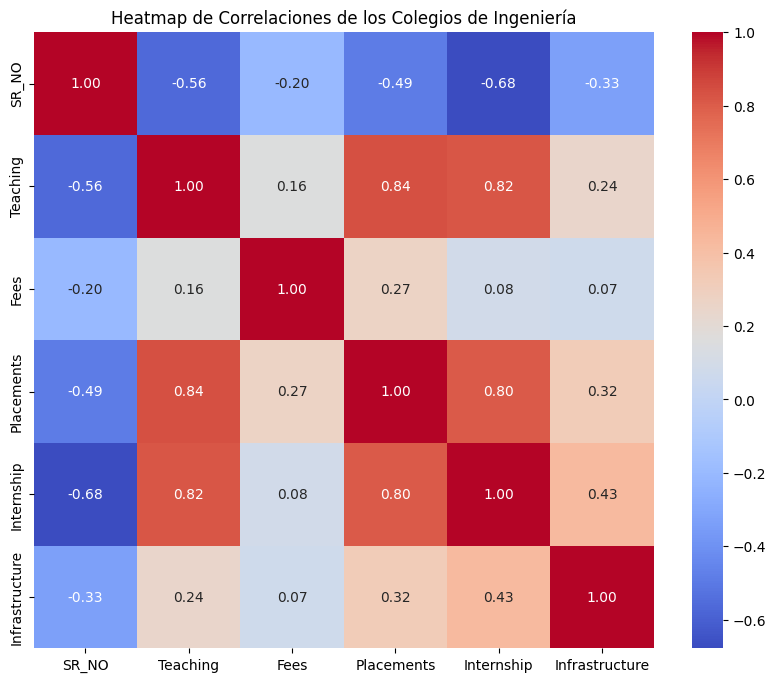

In [9]:
# Calcular la correlación
corr = df.iloc[:, :].corr()

# Configurar el tamaño del plot
plt.figure(figsize=(10, 8))

# Generar el heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# Añadir título
plt.title('Heatmap de Correlaciones de los Colegios de Ingeniería')

# Mostrar el plot

### Ejercicio 5

Podríamos intentar cualquier tipo de clusterización, pero vamos a emplear una clusterización jerárquica porque sea cual sea la agrupación si que nos interesa establecer una jerarquía o una relación de distancia entre las diferentes instituciones (es algo que nos dicen desde el cliente, o sea "Negocio")

Elegido el tipo de clustering, tenemos que determinar los hiperparámetros. En este caso, el número de clusteres. Para ello nos vamos a apoyar en el dendrograma. Construye el dendrograma utilizando "average" como el método de ligado o linkage.



NOTA: no lo hemos hecho, ni dicho, pero nos quedaremos con todas las variables para sean features y como están en la misma escala no hay que procesarlas otra vez.

In [32]:
# Crear el DataFrame
X = train_set.drop(columns=["SR_NO"])

In [37]:
len(X)

26

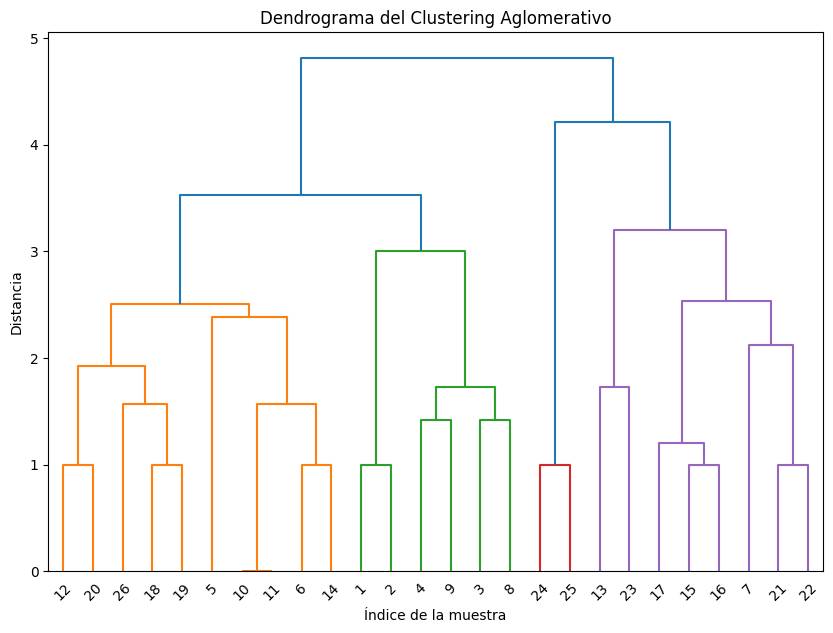

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Cálculo de la matriz de enlace
Z = linkage(X, method='average') # Ajustar 'method' según el criterio de enlace deseado

# Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z,labels=list(train_set["SR_NO"]) )
plt.title('Dendrograma del Clustering Aglomerativo')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.show()

### Ejercicio 6

Utilizando el método del máximo salto horizontal o método del máximo gap, ¿dónde colocarías la recta de corte? Vuelve a dibujar el dendrograma superponiendo esa línea. Decide el número de clusteres.

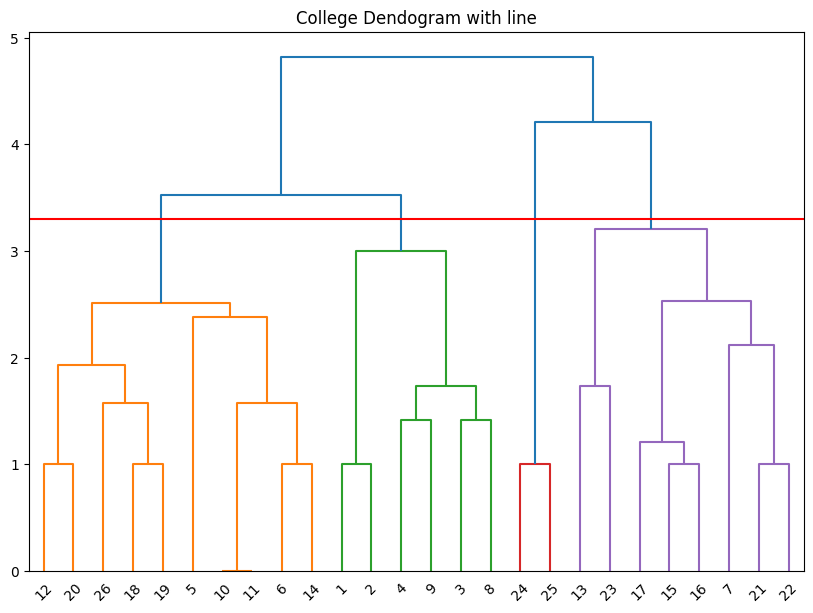

In [39]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("College Dendogram with line")
clusters = shc.linkage(X,
                       method="average",
                       metric="euclidean" 
                       )
shc.dendrogram(clusters, labels=list(train_set["SR_NO"]))
plt.axhline(y=3.3, color ="r", linestyle= "-")

### Ejercicio 7

Utilizando el codigo siguiente, emplea el número de clústeres obtenidos en el ejercicio anterior (usa 4 si no has logrado obtener un número que te convenza) y muestra cuántas instituciones hay por cluster. ¿Qué te llama la atención?

In [40]:
len(clusters)

25

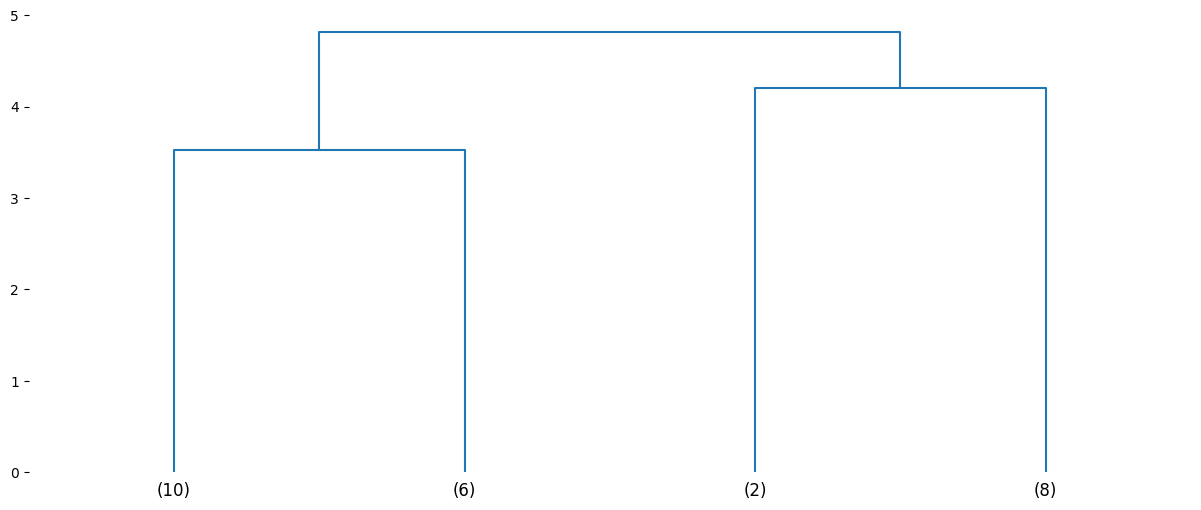

In [27]:
link_method = linkage(X, method='average')
labelList = train_set["SR_NO"]

#Miramos cuantos elementos hay en cada cluster
plt.figure(figsize =(15,6))
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 4, # SUSTITUYE AQUI
                 labels = labelList 
                 )
sns.despine(left=True, bottom=True)

In [16]:
clusters[16]

array([ 6.        , 31.        ,  2.11803399,  3.        ])

6.0: El índice del primer cluster que se está fusionando. Este índice corresponde a uno de los clusters individuales o subclusters en el proceso de clustering jerárquico.

31.0: El índice del segundo cluster que se está fusionando. Similar al primero, este índice representa otro cluster o subcluster.

2.11: La distancia entre los dos clusters que se están fusionando. Esta distancia puede calcularse de diversas maneras según el método de enlace que estés utilizando (en este caso, el método 'average' o promedio).

3.0: El número de elementos en el nuevo cluster resultante de la fusión de los dos clusters anteriores. Este valor indica que el nuevo cluster contiene 3 elementos en total.

### Ejercicio 8

Previo a analizar las características específicas de cada clúster, analiza el clúster con menor número de elementos, es decir muestra las características de sus elementos constituyentes

In [47]:
train_set[train_set["SR_NO"]==(24)]

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
23,24,1,1,1,2,5


In [48]:
train_set[train_set["SR_NO"]==(25)]

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
24,25,1,1,1,1,5


### Ejercicio 9

Nos hemos adelantado en el ejercicio anterior. Es hora de construir el clustering tal como hemos visto en el workout, utiliza el "AgglomerativeClustering" de sklearn para hacer el agrupamiento con el número de clusteres elegido y asigna las etiquetas a cada instancia. (Recuerda que hemos usado el linkage a "average", no a "ward" como se suele emplear)

In [51]:
from sklearn.cluster import AgglomerativeClustering

# Creación de una instancia de Clustering Aglomerativo
agg_clust = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")

# Ajuste del modelo a los datos
agg_clust.fit(X)

# Las etiquetas de los clusters se encuentran en `agg_clust.labels_`
labels = agg_clust.labels_
labels

array([1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 3, 3, 2], dtype=int64)

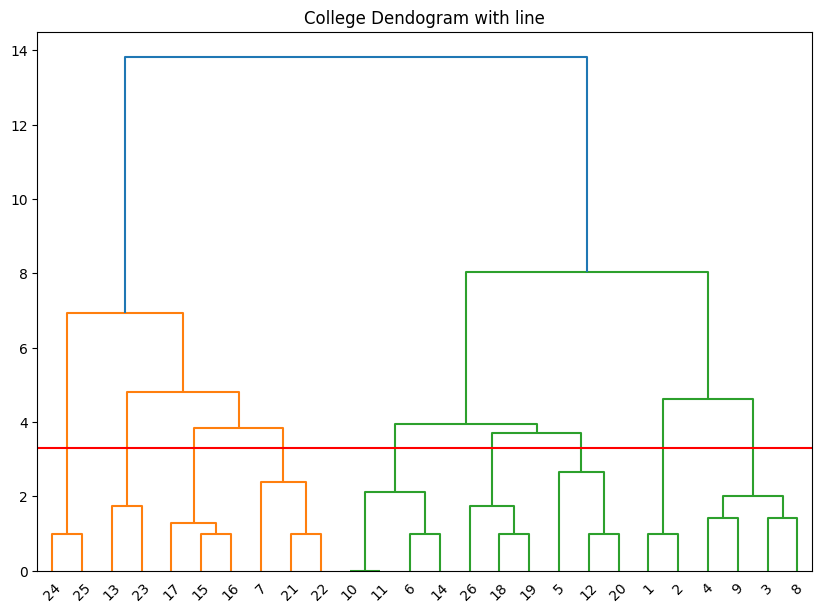

In [55]:
plt.figure(figsize=(10, 7))
plt.title("College Dendogram with line")
clusters = shc.linkage(X,
                       method="ward",
                       metric="euclidean" 
                       )
shc.dendrogram(clusters, labels=list(train_set["SR_NO"]))
plt.axhline(y=3.3, color ="r", linestyle= "-")

### Ejercicio 10

Comprueba que las instancias asignadas al clúster con 2 instancias son las entidades "X" e "Y"

In [58]:
df_1[df_1["SR_NO"]==(24)]

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
23,24,X,1,1,1,2,5


In [59]:
df_1[df_1["SR_NO"]==(25)]

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
24,25,Y,1,1,1,1,5


### Ejercicio 11

Igual que podemos intuir que el cluster "pequeño" es el de las instituiciones peor puntuadas, muestra los valores medios de las features para cada clúster y da tu interpretación de que es cada uno. Emplea un gráfico comparativo.


         SR_NO  Teaching   Fees  Placements  Internship  Infrastructure
cluster                                                                
0        16.75  2.125000  3.125    1.375000        1.75             2.0
1         4.50  4.333333  3.500    4.833333        4.50             4.0
2        14.10  2.800000  4.500    3.300000        2.80             3.8
3        24.50  1.000000  1.000    1.000000        1.50             5.0


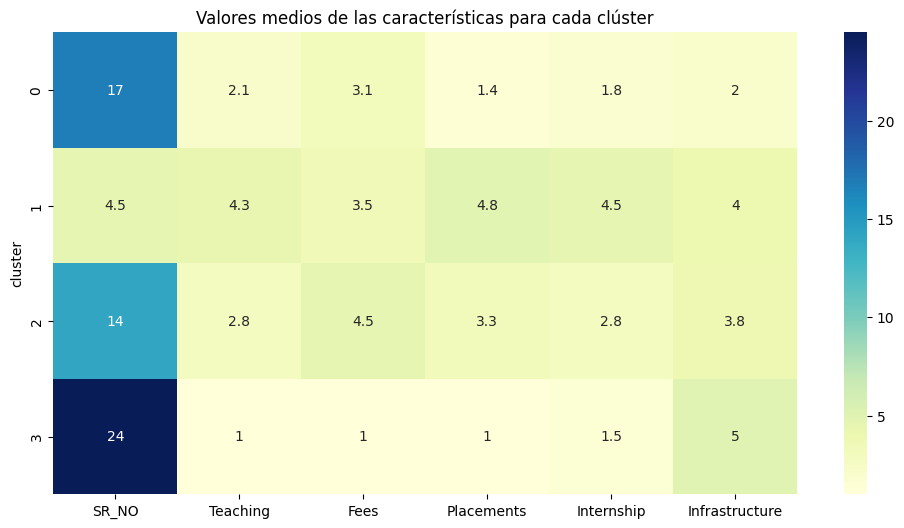

In [61]:
# Añadimos los labels a train_set
train_set['cluster'] = labels

# Calculamos los valores medios para cada clúster
cluster_means = train_set.groupby('cluster').mean()

# Imprimimos los valores medios para cada clúster
print(cluster_means)

# Graficamos los valores medios para cada clúster
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu")
plt.title("Valores medios de las características para cada clúster")
plt.show()


### Ejercicio 12

Para finalizar, ¿qué recomendaciones darías a diferentes clientes en base a los patrones encontrados?